![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/75165824-badf4680-5701-11ea-9c5b-5475b0a33abf.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# Reading external data & Plotting

[Source](https://blockchain.info/charts/market-price)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Pandas can easily read data stored in different file formats like CSV, JSON, XML or even Excel. Parsing always involves specifying the correct structure, encoding and other details. The `read_csv` method reads CSV files and accepts many parameters.

In [168]:
pd.read_csv

<function pandas.io.parsers.readers.read_csv(filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]', *, sep: 'str | None | lib.NoDefault' = <no_default>, delimiter: 'str | None | lib.NoDefault' = None, header: "int | Sequence[int] | None | Literal['infer']" = 'infer', names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>, index_col: 'IndexLabel | Literal[False] | None' = None, usecols=None, dtype: 'DtypeArg | None' = None, engine: 'CSVEngine | None' = None, converters=None, true_values=None, false_values=None, skipinitialspace: 'bool' = False, skiprows=None, skipfooter: 'int' = 0, nrows: 'int | None' = None, na_values=None, keep_default_na: 'bool' = True, na_filter: 'bool' = True, verbose: 'bool' = False, skip_blank_lines: 'bool' = True, parse_dates: 'bool | Sequence[Hashable] | None' = None, infer_datetime_format: 'bool | lib.NoDefault' = <no_default>, keep_date_col: 'bool' = False, date_parser=<no_default>, date_format: 'str | None' = None, dayfirst: '

In [169]:
df = pd.read_csv('data/btc-market-price.csv')
df

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250
...,...,...
359,2018-03-28 00:00:00,7960.380000
360,2018-03-29 00:00:00,7172.280000
361,2018-03-30 00:00:00,6882.531667
362,2018-03-31 00:00:00,6935.480000


In [170]:
df.head()

,2017-04-02 00:00:00,1099.169125
0,2017-04-03 00:00:00,1141.813000
1,2017-04-04 00:00:00,1141.600363
2,2017-04-05 00:00:00,1133.079314
3,2017-04-06 00:00:00,1196.307937
4,2017-04-07 00:00:00,1190.454250


The CSV file we're reading has only two columns: `timestamp` and `price`. It doesn't have a header, it contains whitespaces and has values separated by commas. pandas automatically assigned the first row of data as headers, which is incorrect. We can overwrite this behavior with the `header` parameter:

In [171]:
df = pd.read_csv('data/btc-market-price.csv', header=None)

In [172]:
df.head()
# also try df.sample(), df.tail()

,0,1
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937


We can then set the names of each column explicitely by setting the `df.columns` attribute:

In [173]:
df.columns = ['Timestamp', 'Price']
df

,Timestamp,Price
0,2017-04-02 00:00:00,1099.169125
1,2017-04-03 00:00:00,1141.813000
2,2017-04-04 00:00:00,1141.600363
3,2017-04-05 00:00:00,1133.079314
4,2017-04-06 00:00:00,1196.307937
...,...,...
360,2018-03-28 00:00:00,7960.380000
361,2018-03-29 00:00:00,7172.280000
362,2018-03-30 00:00:00,6882.531667
363,2018-03-31 00:00:00,6935.480000


In [174]:
df.shape

(365, 2)

The type of the `Price` column was correctly interpreted as `float`, but the `Timestamp` was interpreted as a regular string (`object` in pandas notation):

In [175]:
df.dtypes

Timestamp     object
Price        float64
dtype: object

<Axes: >

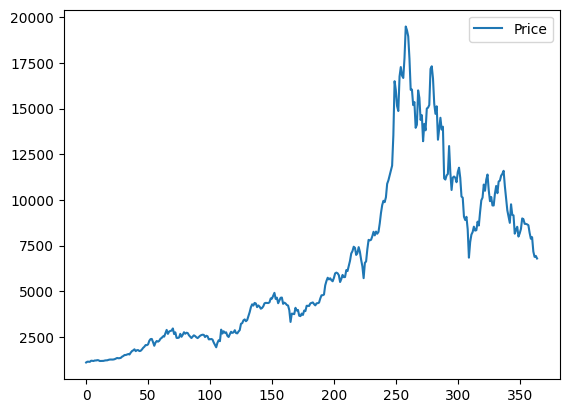

In [176]:
df.plot()
# x axis : df - index
# y axis : df data (only number data)

We can perform a vectorized operation to parse all the Timestamp values as `Datetime` objects:

In [177]:
pd.to_datetime(df['Timestamp'])

0     2017-04-02
1     2017-04-03
2     2017-04-04
3     2017-04-05
4     2017-04-06
         ...    
360   2018-03-28
361   2018-03-29
362   2018-03-30
363   2018-03-31
364   2018-04-01
Name: Timestamp, Length: 365, dtype: datetime64[ns]

In [178]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [179]:
df.head()

,Timestamp,Price
0,2017-04-02,1099.169125
1,2017-04-03,1141.813000
2,2017-04-04,1141.600363
3,2017-04-05,1133.079314
4,2017-04-06,1196.307937


In [180]:
df.dtypes

Timestamp    datetime64[ns]
Price               float64
dtype: object

<Axes: >

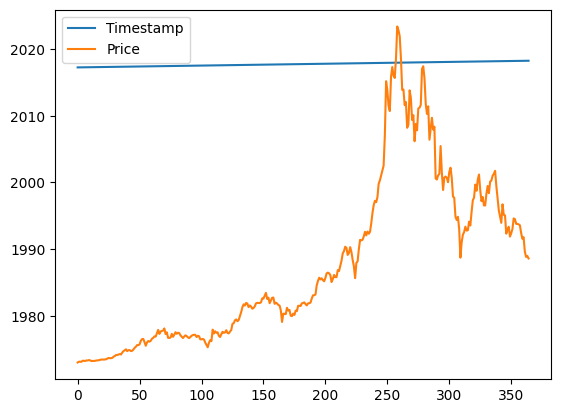

In [181]:
df.plot()
# now we can draw timestamp not as x-axis yet

The timestamp looks a lot like the index of this `DataFrame`: `date > price`. We can change the autoincremental ID generated by pandas and use the `Timestamp DS` column as the Index:

In [182]:
df.set_index('Timestamp', inplace=True)
# you can also try
# df = df.set_index('Timestamp')
df

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


<Axes: xlabel='Timestamp'>

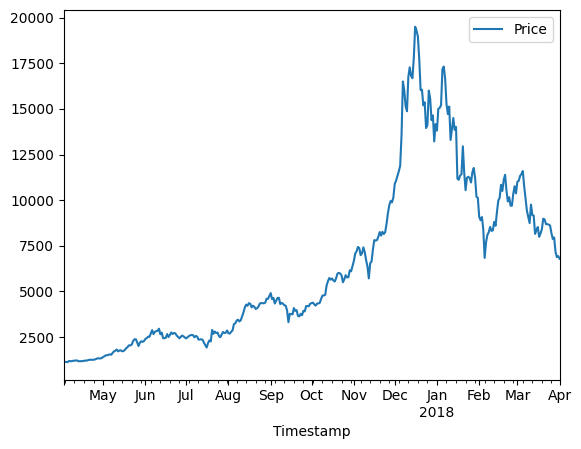

In [183]:
df.plot()

In [184]:
df.loc['2017-09-29':'2017-10-05']

,Price
Timestamp,
2017-09-29,4193.574667
2017-09-30,4335.368317
2017-10-01,4360.722967
2017-10-02,4386.883750
2017-10-03,4293.306600
2017-10-04,4225.175000
2017-10-05,4338.852000


---


In [185]:
df2 = pd.read_csv('data/btc-market-price.csv', header=None)
df2.columns = ['Timestamp', 'Price']
df2.set_index("Timestamp", inplace=True)
df2

,Price
Timestamp,
2017-04-02 00:00:00,1099.169125
2017-04-03 00:00:00,1141.813000
2017-04-04 00:00:00,1141.600363
2017-04-05 00:00:00,1133.079314
2017-04-06 00:00:00,1196.307937
...,...
2018-03-28 00:00:00,7960.380000
2018-03-29 00:00:00,7172.280000
2018-03-30 00:00:00,6882.531667


In [186]:
df.dtypes

Price    float64
dtype: object

In [187]:
df2.loc["2018-03-25 00:00:00":"2018-03-31 00:00:00"]

,Price
Timestamp,
2018-03-25 00:00:00,8617.296667
2018-03-26 00:00:00,8197.548333
2018-03-27 00:00:00,7876.195000
2018-03-28 00:00:00,7960.380000
2018-03-29 00:00:00,7172.280000
2018-03-30 00:00:00,6882.531667
2018-03-31 00:00:00,6935.480000


<Axes: xlabel='Timestamp'>

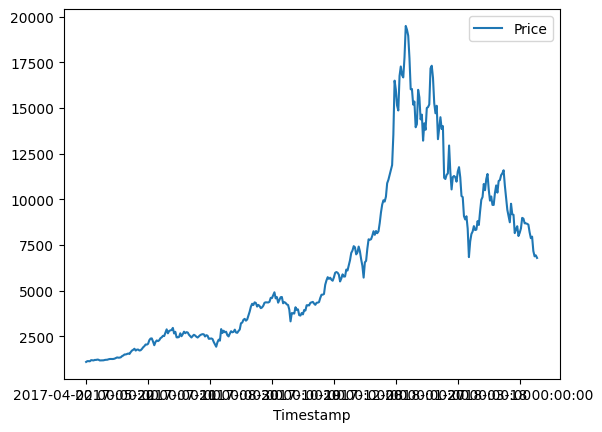

In [188]:
df2.plot()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Putting everything together

And now, we've finally arrived to the final, desired version of the `DataFrame` parsed from our CSV file. The steps were:

In [189]:
df = pd.read_csv('data/btc-market-price.csv', header=None)
df.columns = ['Timestamp', 'Price']
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)

In [190]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


**There should be a better way**. And there is 😎. And there usually is, explicitly with all these repetitive tasks with pandas.

The `read_csv` function is extremely powerful and you can specify many more parameters at import time. We can achive the same results with only one line by doing:

In [191]:
df = pd.read_csv(
    'data/btc-market-price.csv',
    header=None,
    names=['Timestamp', 'Price'],
    index_col=0,
    parse_dates=True
)

In [192]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


In [193]:
df.loc['2017-09-29']

Price    4193.574667
Name: 2017-09-29 00:00:00, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Plotting basics

`pandas` integrates with Matplotlib and creating a plot is as simple as:

<Axes: xlabel='Timestamp'>

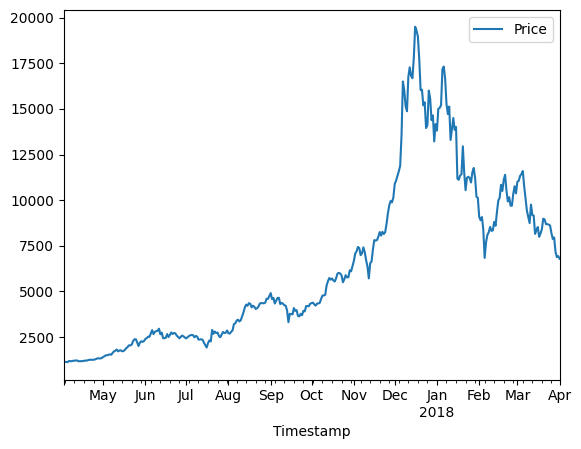

In [194]:
df.plot()

Behind the scenes, it's using `matplotlib.pyplot`'s interface. We can create a similar plot with the `plt.plot()` function:

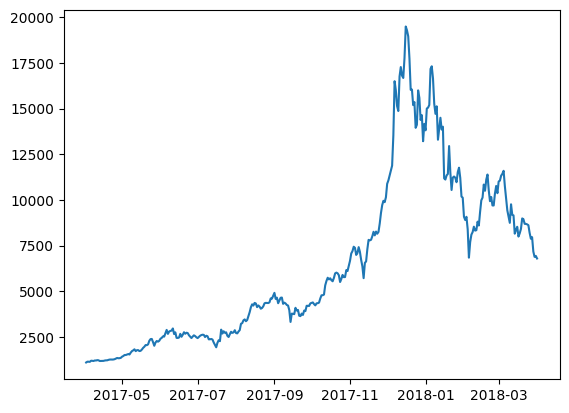

In [195]:
plt.plot(df.index, df['Price'])

`plt.plot()` accepts many parameters, but the first two ones are the most important ones: the values for the `X` and `Y` axes. Another example:

In [196]:
x = np.arange(-10, 11)

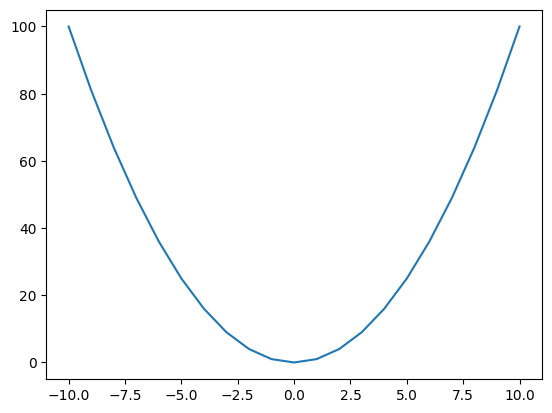

In [197]:
plt.plot(x, x ** 2)

We're using `matplotlib`'s global API, which is horrible but it's the most popular one. We'll learn later how to use the _OOP_ API which will make our work much easier.

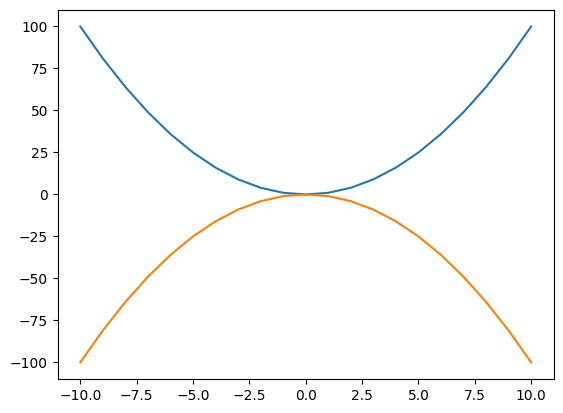

In [198]:
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Each `plt` function alters the global state. If you want to set settings of your plot you can use the `plt.figure` function. Others like `plt.title` keep altering the global plot:

Text(0.5, 1.0, 'My Nice Plot')

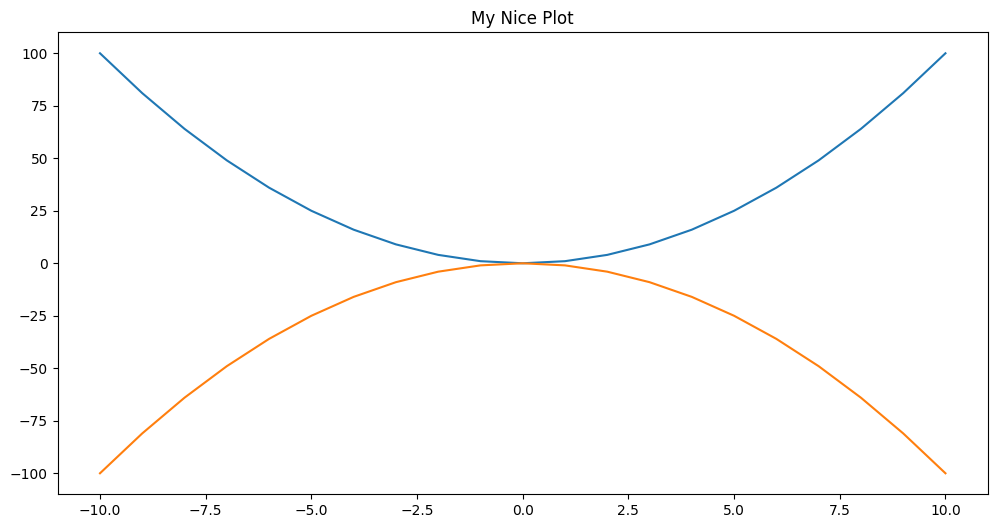

In [199]:
plt.figure(figsize=(12, 6))
plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

plt.title('My Nice Plot')

Some of the arguments in `plt.figure` and `plt.plot` are available in the pandas' `plot` interface:

<Axes: title={'center': 'Bitcoin Price 2017-2018'}, xlabel='Timestamp'>

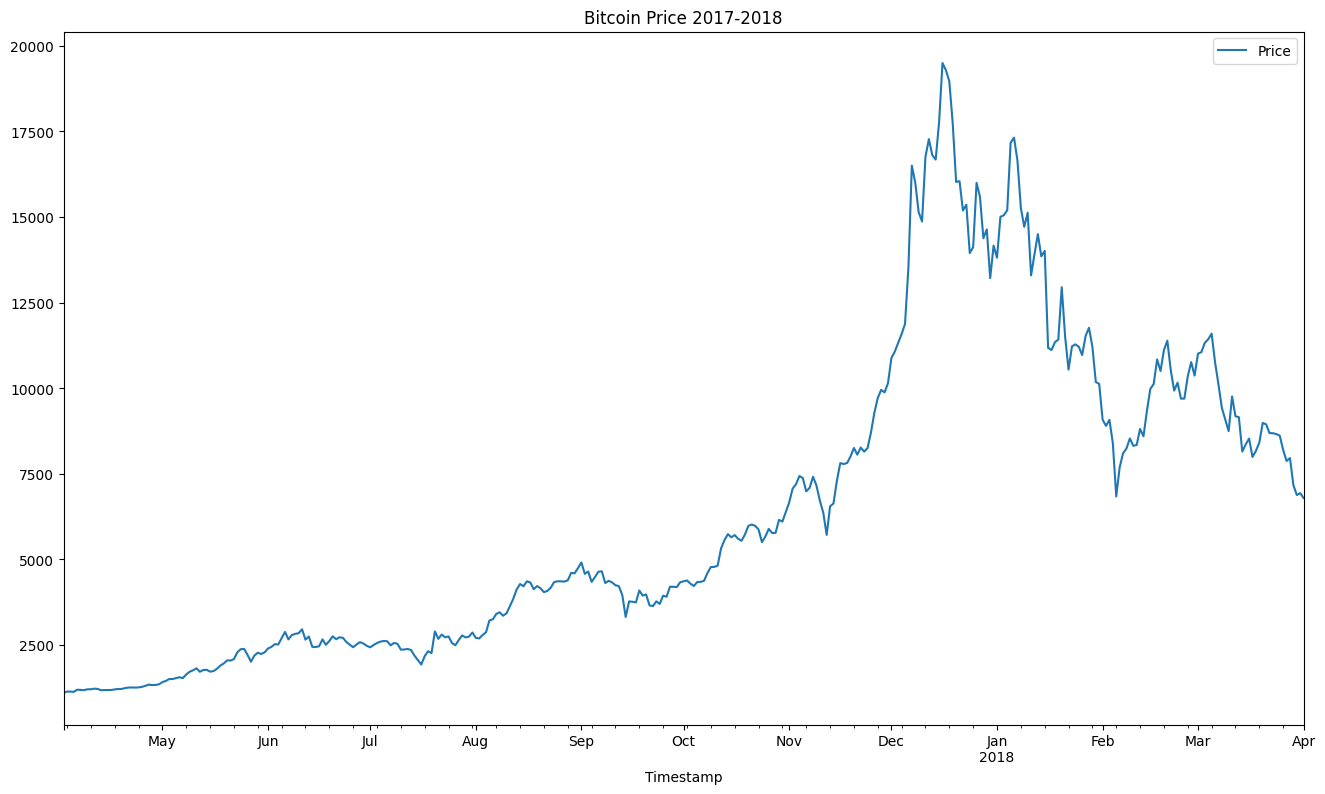

In [200]:
df.plot(figsize=(16, 9), title='Bitcoin Price 2017-2018')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## A more challenging parsing

To demonstrate plotting two columns together, we'll try to add Ether prices to our `df` DataFrame. The ETH prices data can be found in the `data/eth-price.csv` file. The problem is that it seems like that CSV file was created by someone who really hated programmers. Take a look at it and see how ugly it looks like. We'll still use `pandas` to parse it.

In [201]:
eth = pd.read_csv('data/eth-price.csv')
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


In [202]:
eth.describe()

,UnixTimeStamp,Value
count,3.620000e+02,362.000000
mean,1.506767e+09,429.927514
std,9.137639e+06,308.254288
min,1.491091e+09,42.310000
25%,1.498889e+09,238.525000
50%,1.506686e+09,308.825000
75%,1.514743e+09,657.502500
max,1.522541e+09,1385.020000


In [203]:
eth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date(UTC)      362 non-null    object 
 1   UnixTimeStamp  362 non-null    int64  
 2   Value          362 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.6+ KB


In [204]:
# eth["Date(UTC)"] = pd.to_datetime(eth["Date(UTC)"])

As you can see, it has a `Value` column (which represents the price), a `Date(UTC)` one that has a string representing dates and also a `UnixTimeStamp` date represeting the datetime in unix timestamp format. The header is read automatically, let's try to parse dates with the CSV Reader:

In [205]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True)
print(eth.dtypes)
eth.head()

Date(UTC)         object
UnixTimeStamp      int64
Value            float64
dtype: object


,Date(UTC),UnixTimeStamp,Value
0,4/2/2017,1491091200,48.55
1,4/3/2017,1491177600,44.13
2,4/4/2017,1491264000,44.43
3,4/5/2017,1491350400,44.90
4,4/6/2017,1491436800,43.23


Seems like the `parse_dates` attribute didn't work. We'll need to add a little bit more customization. Let's divide this problem and focus on the problem of "date parsing" first. The simplest option would be to use the `UnixTimeStamp` column. The `pandas` module has a `to_datetime` function that converts Unix timestamps to Datetime objects automatically:

In [208]:
eth['Date(UTC)'] = pd.to_datetime(eth['Date(UTC)'])
eth

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23
...,...,...,...
357,2018-03-28,1522195200,445.93
358,2018-03-29,1522281600,383.90
359,2018-03-30,1522368000,393.82
360,2018-03-31,1522454400,394.07


The problem is the precision of unix timestamps. To match both columns we'll need to use the same index and, our `df` containing Bitcoin prices, is "per day":

In [209]:
df.head()

,Price
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937


We could either, remove the precision of `UnixTimeStamp` or attempt to parse the `Date(UTC)`. Let's do String parsing of `Date(UTC)` for fun:

In [211]:
eth.head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


That seems to work fine! Why isn't it then parsing the `Date(UTC)` column? Simple, the `parse_dates=True` parameter will instruct pandas to parse the index of the `DataFrame`. If you want to parse any other column, you must explicitly pass the column position or name:

In [214]:
pd.read_csv('data/eth-price.csv', parse_dates=[0]).head()

,Date(UTC),UnixTimeStamp,Value
0,2017-04-02,1491091200,48.55
1,2017-04-03,1491177600,44.13
2,2017-04-04,1491264000,44.43
3,2017-04-05,1491350400,44.90
4,2017-04-06,1491436800,43.23


Putting everything together again:

In [215]:
eth = pd.read_csv('data/eth-price.csv', parse_dates=True, index_col=0)
print(eth.info())
eth.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 362 entries, 2017-04-02 to 2018-04-01
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UnixTimeStamp  362 non-null    int64  
 1   Value          362 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.5 KB
None


,UnixTimeStamp,Value
Date(UTC),,
2017-04-02,1491091200,48.55
2017-04-03,1491177600,44.13
2017-04-04,1491264000,44.43
2017-04-05,1491350400,44.90
2017-04-06,1491436800,43.23


We can now combine both `DataFrame`s into one. Both have the same index, so aligning both prices will be easy. Let's first create an empty `DataFrame` and with the index from Bitcoin prices:

In [217]:
prices = pd.DataFrame(index=df.index)
prices

""
Timestamp
2017-04-02
2017-04-03
2017-04-04
2017-04-05
2017-04-06
...
2018-03-28
2018-03-29
2018-03-30


And we can now just set columns from the other `DataFrame`s:

In [219]:
prices['Bitcoin'] = df['Price']
prices

,Bitcoin
Timestamp,
2017-04-02,1099.169125
2017-04-03,1141.813000
2017-04-04,1141.600363
2017-04-05,1133.079314
2017-04-06,1196.307937
...,...
2018-03-28,7960.380000
2018-03-29,7172.280000
2018-03-30,6882.531667


In [221]:
prices['Ether'] = eth['Value']
prices

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23
...,...,...
2018-03-28,7960.380000,445.93
2018-03-29,7172.280000,383.90
2018-03-30,6882.531667,393.82


<Axes: xlabel='Timestamp'>

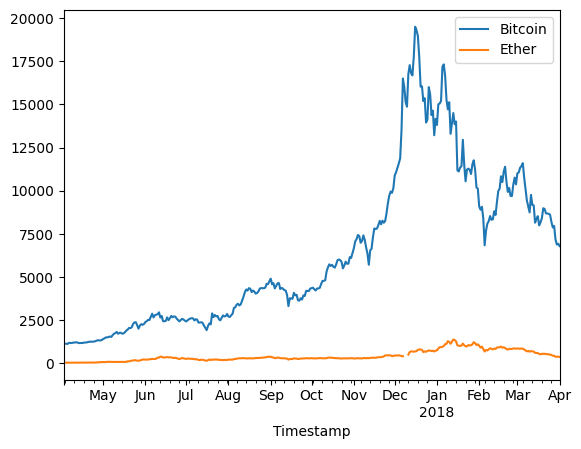

In [225]:
prices.plot()

We can now try plotting both values:

<Axes: xlabel='Timestamp'>

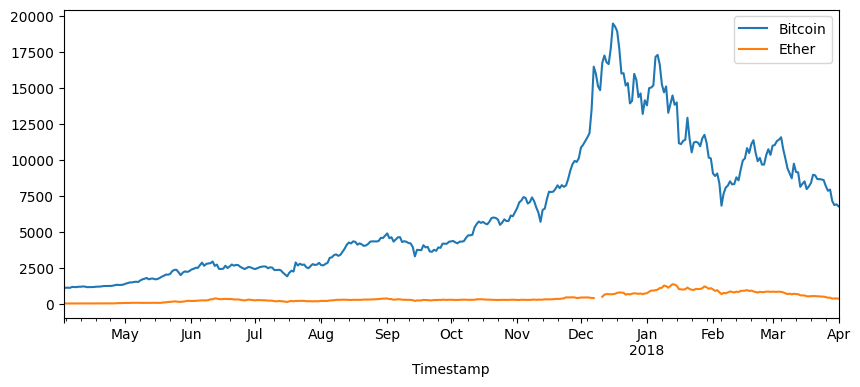

In [227]:
prices.plot(figsize=(10, 4))

🤔seems like there's a tiny gap between Dec 2017 and Jan 2018. Let's zoom in there:

<Axes: xlabel='Timestamp'>

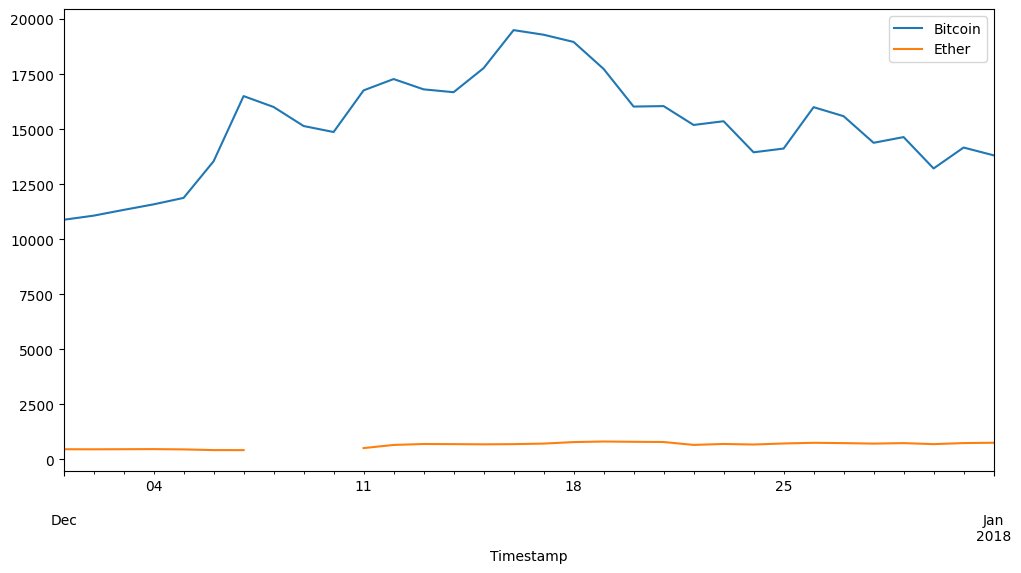

In [228]:
prices.loc['2017-12-01':'2018-01-01'].plot(figsize=(12, 6))

Oh no, missing data 😱. We'll learn how to deal with that later 😉.

Btw, did you note that fancy indexing `'2017-12-01':'2018-01-01'` 😏. That's pandas power 💪. We'll learn how to deal with TimeSeries later too.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
